In [1]:
import os
img_Data = sorted(os.listdir('/kaggle/input/alltownswithweather/Data/Images'))

In [2]:
import PIL
img = PIL.Image.open(f'/kaggle/input/alltownswithweather/Data/Images/{img_Data[0]}')

In [3]:
500%500

0

In [4]:
import os 
len(os.listdir('/kaggle/input/alltownswithweather/Data/Images'))

86491

In [ ]:
pil

In [5]:
import cv2
x_img_arr = []
img_path = sorted(os.listdir('/kaggle/input/alltownswithweather/Data/Images'))
count=0
for i in range(len(img_path))[0:40000]:
    if count%2000==0: 
        print(count)
    count+=1
    img_arr = cv2.imread(f'/kaggle/input/alltownswithweather/Data/Images/{img_path[i]}', cv2.IMREAD_COLOR)
    img_resized = cv2.resize(img_arr, (200, 66))  # width, height
    img_resized = (img_resized / 127.5) - 1

    x_img_arr.append(img_resized)
    
    
    

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000


In [8]:
import numpy as np
x_img_arr = np.array(x_img_arr, dtype=np.float32)


In [9]:
y_input=[]
with open('/kaggle/input/alltownswithweather/Data/SteerValues/steer_values.txt') as f:
    lines = f.readlines()
for i in range(len(lines))[0:40000]:
    y_input.append(float(lines[i]))

<function ndarray.max>

In [10]:
y_input = np.array(y_input[:len(x_img_arr)], dtype=np.float32)  # make sure lengths match


In [76]:
np.max(y_input)

0.6412021

In [77]:
np.min(y_input) -0.36709666


-0.36709666

In [11]:
y_input[0] -0.003080117


-0.003080117

In [12]:
img_size = {}

for i in range(len(x_img_arr)):
    shape = x_img_arr[i].shape
    if shape == (66, 200, 3):
        if shape not in img_size:
            img_size[shape] = 0
        img_size[shape] += 1

print(img_size)



{(66, 200, 3): 40000}


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_img_arr,y_input,random_state=42,test_size=0.2)

In [14]:
y_input[0]

-0.003080117

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
model = keras.Sequential([
    keras.Input(shape=(66, 200, 3)),

    keras.layers.Conv2D(24, (5,5), strides=(2,2), activation='relu'),
    keras.layers.Conv2D(36, (5,5), strides=(2,2), activation='relu'),
    keras.layers.Conv2D(48, (5,5), strides=(2,2),  activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3),  activation='relu'),

    keras.layers.Flatten(),

    
    keras.layers.Dense(1164, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)  
])


I0000 00:00:1762789344.258928      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762789344.259585      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1164)           │     1,342,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       116,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,595,511 (6.09 MB)

 Trainable params: 1,595,511 (6.09 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='mse',
              metrics=['mae','mse'])


In [20]:
eas = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    start_from_epoch=0,
)


In [21]:
history=model.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    shuffle=True,callbacks=[eas]
)

Epoch 1/30


I0000 00:00:1762789371.170618     114 service.cc:148] XLA service 0x7f52c8003260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762789371.171540     114 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762789371.171560     114 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762789371.627367     114 cuda_dnn.cc:529] Loaded cuDNN version 90300


 16/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0109 - mae: 0.0481 - mse: 0.0109

I0000 00:00:1762789375.249390     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0063 - mae: 0.0329 - mse: 0.0063 - val_loss: 0.0024 - val_mae: 0.0201 - val_mse: 0.0024
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0018 - mae: 0.0173 - mse: 0.0018 - val_loss: 0.0017 - val_mae: 0.0161 - val_mse: 0.0017
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0010 - mae: 0.0131 - mse: 0.0010 - val_loss: 7.8443e-04 - val_mae: 0.0117 - val_mse: 7.8443e-04
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 6.5358e-04 - mae: 0.0107 - mse: 6.5358e-04 - val_loss: 6.7645e-04 - val_mae: 0.0103 - val_mse: 6.7645e-04
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 4.1166e-04 - mae: 0.0087 - mse: 4.1166e-04 - val_loss: 6.1377e-04 - val_mae: 0.0101 - val_mse: 6.1377e-04
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 3.5780e-04 - mae: 0.0081 - mse: 3.5780e-04 - val_loss: 5.4458e-04 - val_mae: 0.0093 - val_mse: 5.4458e-04
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/

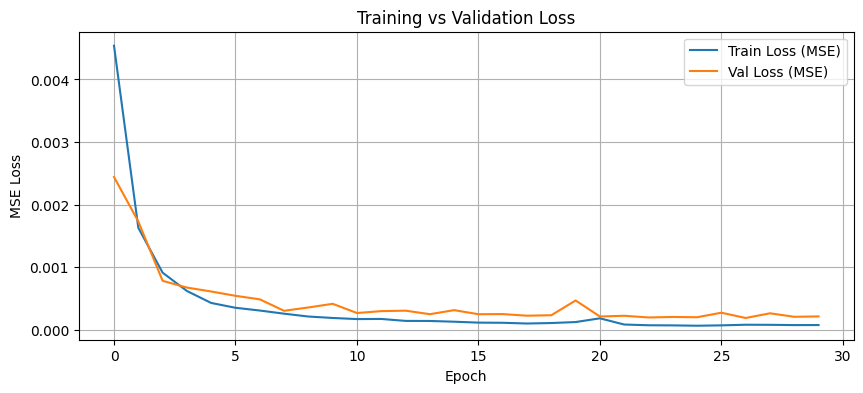

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


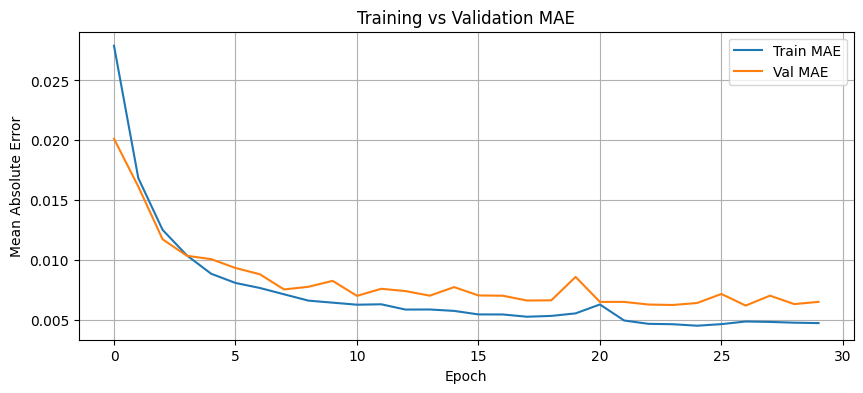

In [23]:

# Plot MAE
plt.figure(figsize=(10, 4))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
x_test[0][0][0]

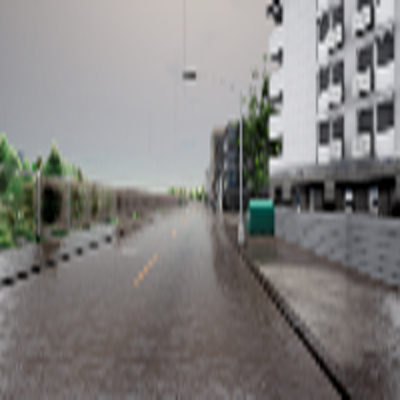

In [65]:
img_test = x_test[1]
img_test = ((img_test + 1) / 2.0 * 255).clip(0, 255).astype('uint8')
import PIL
img_resized = cv2.resize(img_test, (400, 400), interpolation=cv2.INTER_CUBIC)

img = PIL.Image.fromarray(cv2.cvtColor(img_resized,cv2.COLOR_RGB2BGR))
img

In [68]:
y_test[2]

-0.005124275

In [70]:
imggg = x_test.reshape(1, 66, 200, 3)
pred = model.predict(imggg, verbose=0)
print(pred)


[[-0.00037577]]


In [71]:
y_pred =model.predict(x_test, verbose=0)



In [73]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)


In [78]:
import numpy as np

mse = 0.00021159236
y_min, y_max = -0.36709666, 0.6412021

rmse = np.sqrt(mse)
range_ = y_max - y_min

error_percent = (rmse / range_) * 100
print(error_percent)


1.4426492627907195


In [81]:
model.save('/kaggle/working/bestmodel.keras')

In [84]:
model.save_weights("/kaggle/working/self_driving_weights.weights.h5")
